# Continuous Control

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from hydra import initialize, compose
from hydra.utils import instantiate


In [3]:
with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config.yaml")
    print(cfg)

{'trainer': {'_target_': 'trainer.Trainer', 'n_episodes': 1000, 'max_t': 3000, 'batch_size': 64, 'gamma': 0.99, 'tau': 0.001, 'n_agents': 20, 'run_headless': True, 'print_setup': True, 'print_every': 10, 'target_score': 31, 'window_size': 100, 'scores_path': 'scores.pkl', 'buffer_size': 1000000, 'agent_cfg': {'actor': {'lr': 0.0001, 'hidden_units': [512, 256, 128, 64]}, 'critic': {'lr': 0.0003, 'weight_decay': 0, 'fc_1': 384, 'fc_2': 256, 'fc_3': 128}, 'eps': {'init': 1.0, 'end': 0.01, 'decay': 0.995}, 'learn_iterations': 15, 'update_every': 10, 'seed': 2}, 'oun_cfg': {'mu': 0.0, 'theta': 0.15, 'sigma': 0.2}}}


In [4]:
t = instantiate(cfg.trainer)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


num agents: 20
state_size: 33
action_size: 4
example states:
 [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
# train agent
scores = t.train()
print(f"done")

E 10	Avg Score: 0.79793,		Last Score:  1.499
E 20	Avg Score: 1.77768,		Last Score:  4.696
E 30	Avg Score: 3.83827,		Last Score:  12.154
E 40	Avg Score: 8.27271,		Last Score:  27.613
E 50	Avg Score: 13.11113,		Last Score:  36.950
E 60	Avg Score: 17.08080,		Last Score:  36.428
E 70	Avg Score: 20.06060,		Last Score:  38.796
E 80	Avg Score: 22.21214,		Last Score:  37.756
E 90	Avg Score: 23.84843,		Last Score:  37.791
E 100	Avg Score: 24.95953,		Last Score:  31.115
E 110	Avg Score: 27.99991,		Last Score:  35.402
E 120	Avg Score: 31.22224,		Last Score:  34.029

Env solved in 120 episodes!	Avg Score: 31.22
params saved: ./params/best_params_31_....
done


In [6]:
t.cleanup()

env closed


In [7]:
with open(cfg.trainer.scores_path, "rb") as f:
    scores = pickle.load(f)

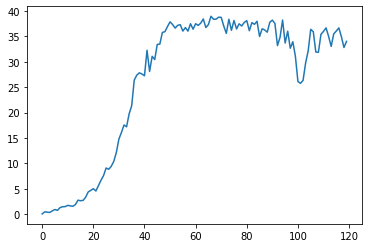

In [8]:
plt.plot(scores)

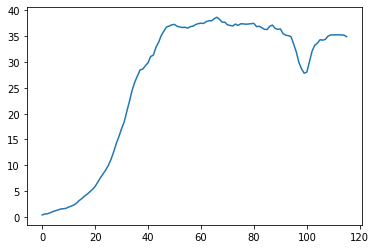

In [9]:
WINDOW_N = 5
smooth = np.convolve(scores, np.ones(WINDOW_N)/WINDOW_N, mode='valid')
plt.plot(smooth)